In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
upload_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/upload_eval.csv'
upload = pd.read_csv(upload_csv_path)
upload['remain_upload_time'] = upload['upload_time'] - upload['obfuscation_time'] - upload['generate_fake_rows_time']-upload["db_query_time"]-upload["db_write_time"]
upload['total_rows'] = upload['data_per_true']*upload['real_data_rows']
print(upload)

     data_per_true  real_data_rows  fake_data_rows  generate_fake_rows_time  \
0               10            8000           72000                 4.366713   
1               10              50             450                 0.066085   
2               10             100             900                 0.094467   
3               10             500            4500                 0.318248   
4               10            5000           45000                 2.713437   
..             ...             ...             ...                      ...   
904            300            3000          897000                49.650885   
905            300               1             299                 0.054968   
906            300              10            2990                 0.186895   
907            300             100           29900                 1.681922   
908            300            1000          299000                16.703688   

     obfuscation_time  numbers_of_real_data_in_db_b

In [3]:
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '50-100', '100-150', '150-200','200-250','250-300']
upload['Dilution_Ratio_Bucket'] = pd.cut(upload['data_per_true'], bins=bins, labels=labels, right=False)

In [4]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()

# subplots

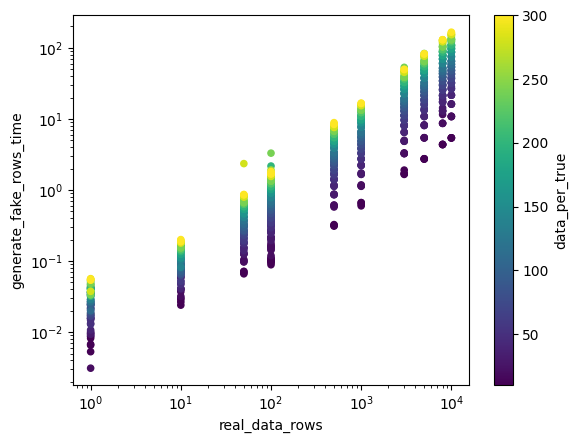

In [5]:
ax = upload.plot.scatter(x='real_data_rows', y='generate_fake_rows_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_gen_fake.png')

In [6]:
averaged_generate_fake_rows_time = bucket(upload,'generate_fake_rows_time')

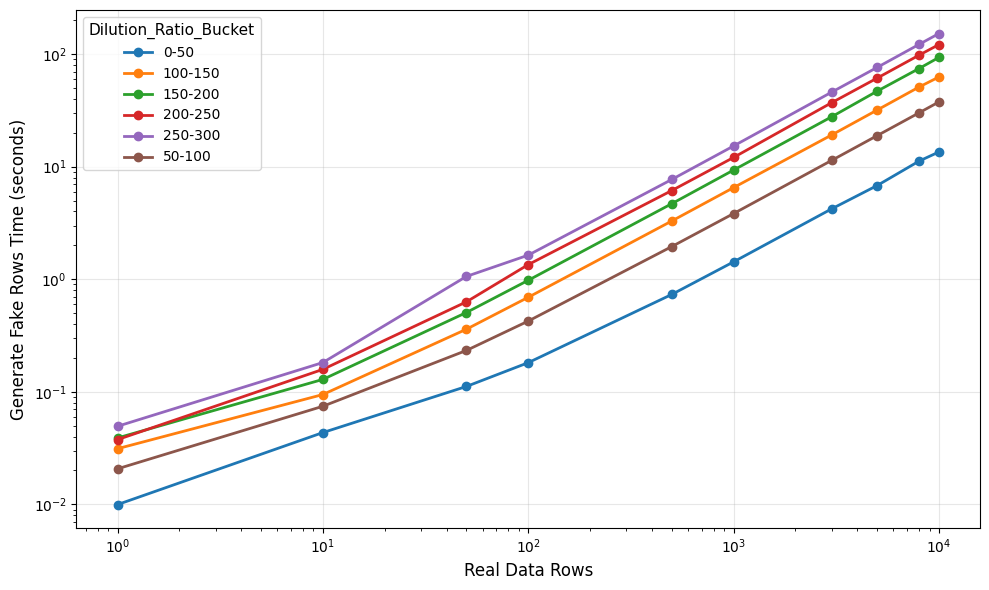

In [7]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_generate_fake_rows_time['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_generate_fake_rows_time[averaged_generate_fake_rows_time['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['generate_fake_rows_time'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Generate Fake Rows Time (seconds)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_gen_fake_by_bucket.jpg', dpi=300, bbox_inches='tight')


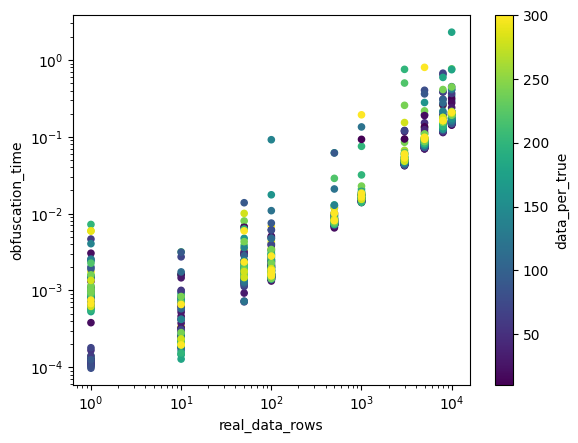

In [8]:
ax = upload.plot.scatter(x='real_data_rows', y='obfuscation_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_obfuscation_time.png')

In [9]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_obfuscation_time = bucket(upload,'obfuscation_time')

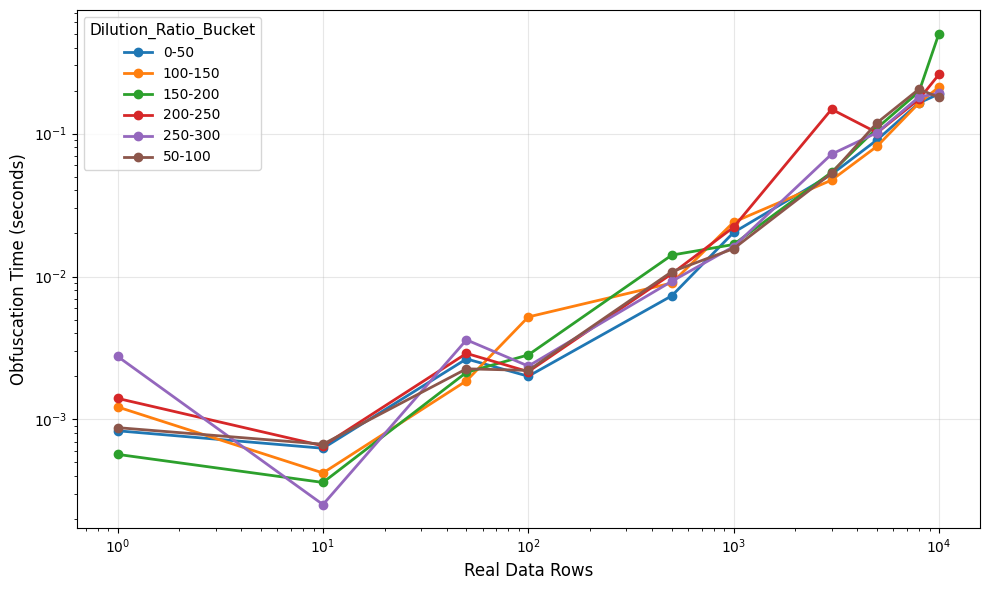

In [10]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_obfuscation_time['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_obfuscation_time[averaged_obfuscation_time['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['obfuscation_time'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Obfuscation Time (seconds)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_obfuscation_by_bucket.jpg', dpi=300, bbox_inches='tight')


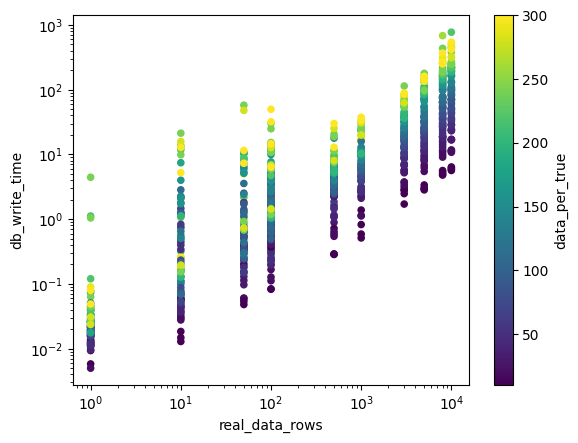

In [11]:
ax = upload.plot.scatter(x='real_data_rows', y='db_write_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_db_write_time.png')

In [12]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_db_write_time = bucket(upload,'db_write_time')

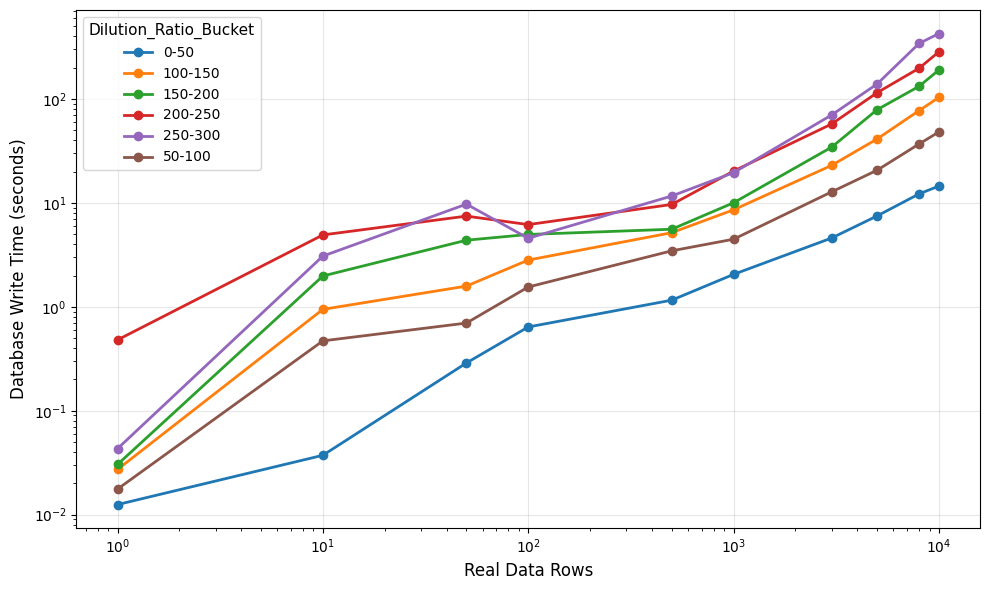

In [13]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_db_write_time['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_db_write_time[averaged_db_write_time['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['db_write_time'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Database Write Time (seconds)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_dbwrite_by_bucket.jpg', dpi=300, bbox_inches='tight')


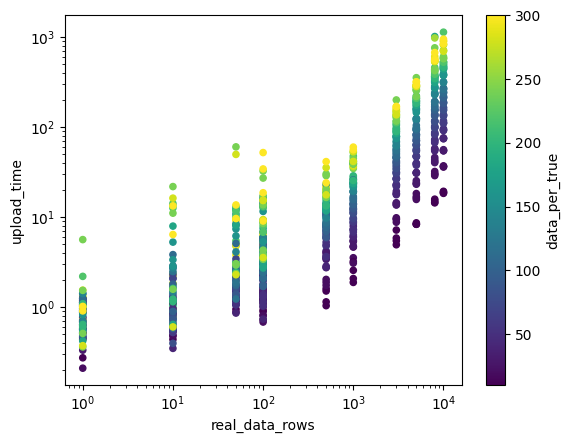

In [14]:
ax = upload.plot.scatter(x='real_data_rows', y='upload_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_time.png')

In [15]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_upload_time = bucket(upload,'upload_time')

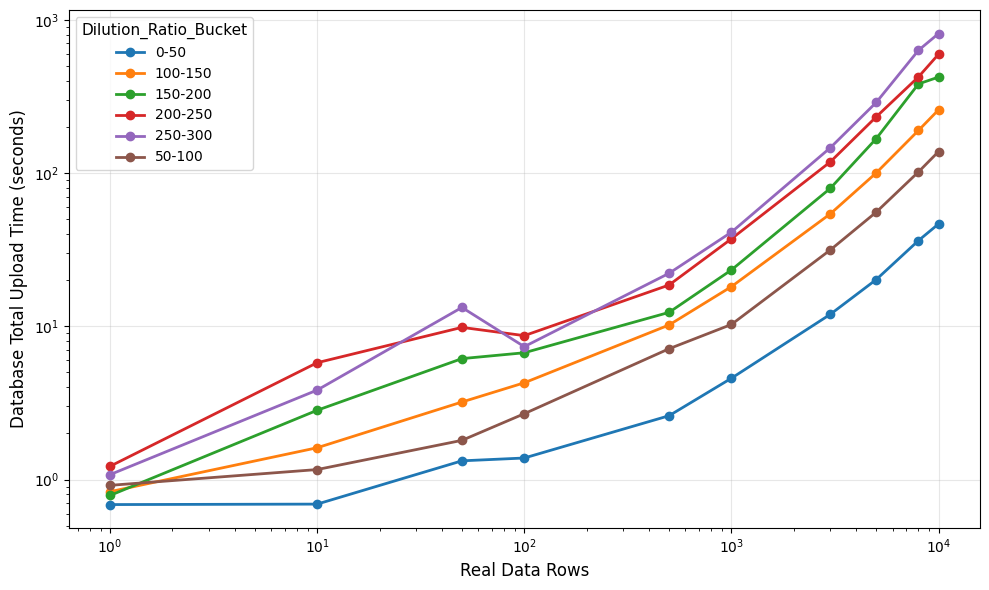

In [16]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_upload_time['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_upload_time[averaged_upload_time['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['upload_time'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Database Total Upload Time (seconds)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_total_upload_by_bucket.jpg', dpi=300, bbox_inches='tight')


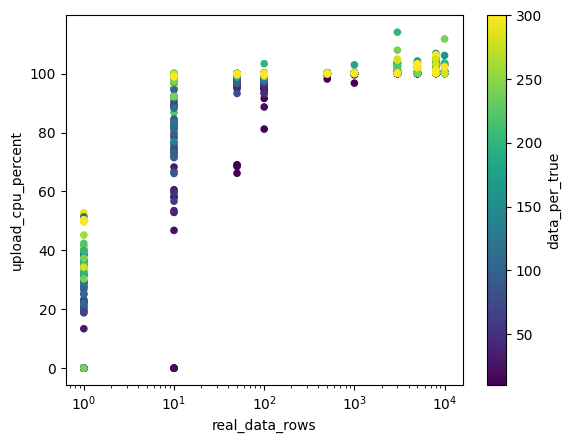

In [17]:
ax = upload.plot.scatter(x='real_data_rows', y='upload_cpu_percent',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_cpu.png')

In [18]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_upload_cpu = bucket(upload,'upload_cpu_percent')

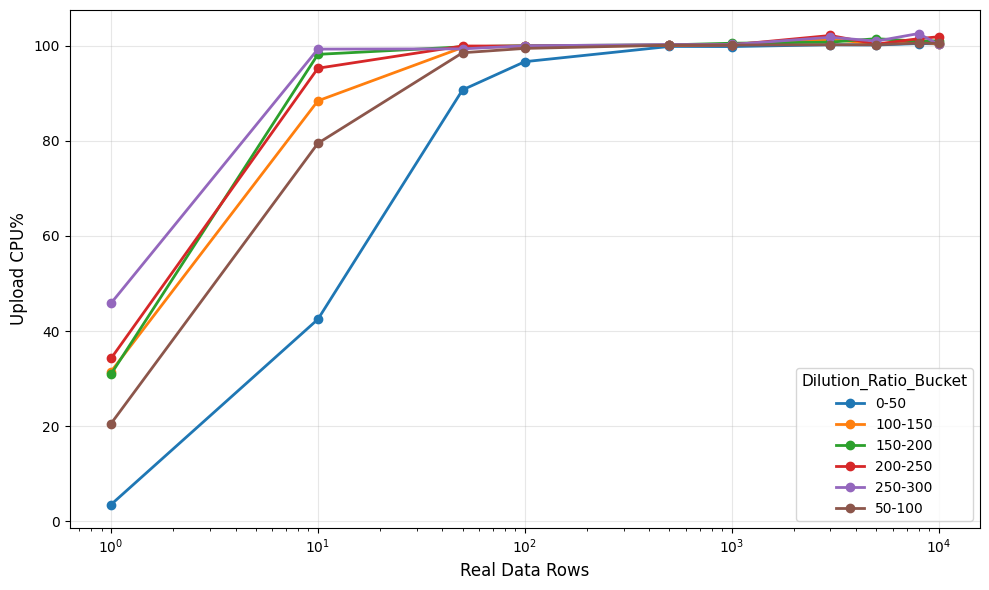

In [19]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_upload_cpu['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_upload_cpu[averaged_upload_cpu['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['upload_cpu_percent'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Upload CPU%', fontsize=12)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_cpu_by_bucket.jpg', dpi=300, bbox_inches='tight')


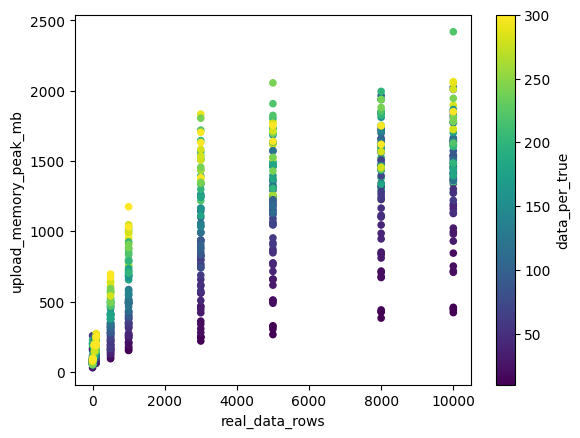

In [20]:
ax = upload.plot.scatter(x='real_data_rows', y='upload_memory_peak_mb',c='data_per_true',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_memory-peak.png')

In [21]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_upload_memory = bucket(upload,'upload_memory_peak_mb')

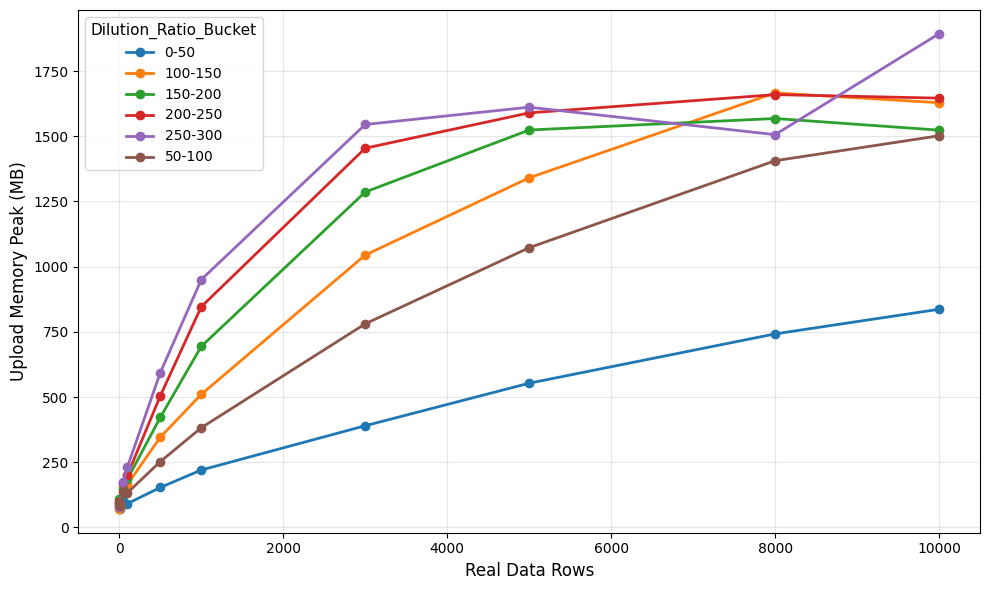

In [22]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_upload_memory['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_upload_memory[averaged_upload_memory['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['upload_memory_peak_mb'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Upload Memory Peak (MB)', fontsize=12)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_memory.jpg', dpi=300, bbox_inches='tight')


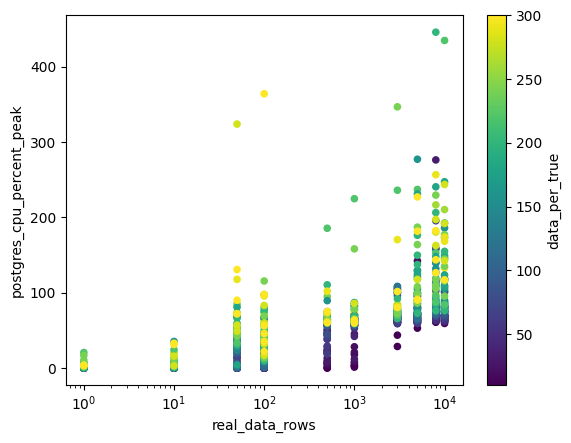

In [23]:
ax = upload.plot.scatter(x='real_data_rows', y='postgres_cpu_percent_peak',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_psql_cpu.png')

In [24]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_upload_psqlcpu = bucket(upload,'postgres_cpu_percent_peak')

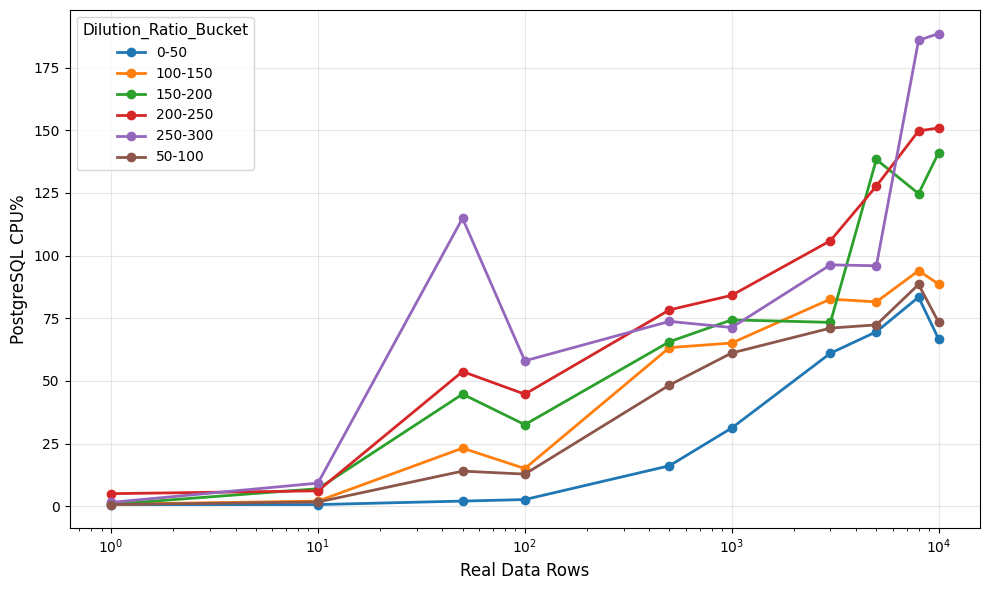

In [25]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_upload_psqlcpu['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_upload_psqlcpu[averaged_upload_psqlcpu['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['postgres_cpu_percent_peak'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('PostgreSQL CPU%', fontsize=12)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_psql_cpu.jpg', dpi=300, bbox_inches='tight')


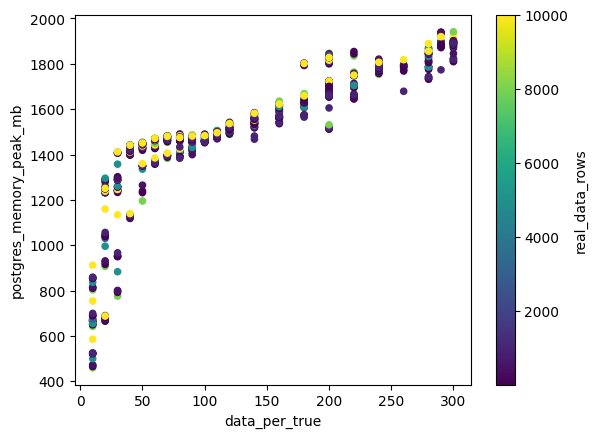

In [26]:
ax = upload.plot.scatter(x='data_per_true', y='postgres_memory_peak_mb',c='real_data_rows',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_psql_memory_peak.png')

In [27]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_upload_psqlmem = bucket(upload,'postgres_memory_peak_mb')

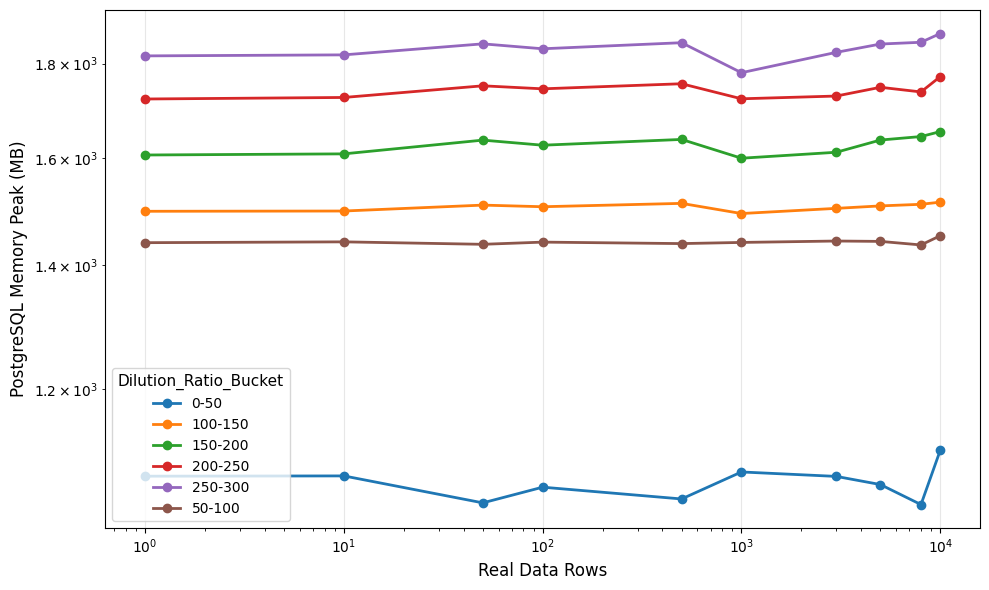

In [29]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_upload_psqlmem['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_upload_psqlmem[averaged_upload_psqlmem['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['postgres_memory_peak_mb'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('PostgreSQL Memory Peak (MB)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_psql_mem.jpg', dpi=300, bbox_inches='tight')


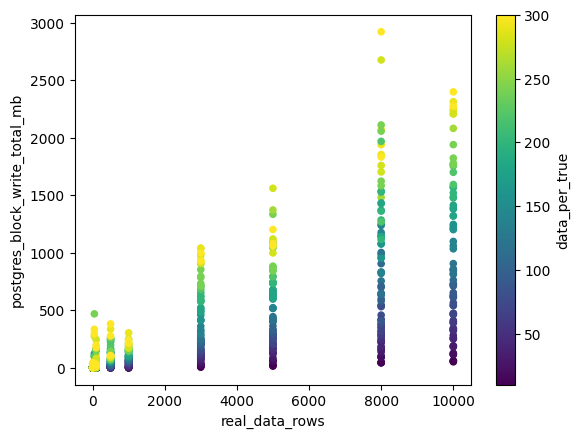

In [30]:
ax = upload.plot.scatter(x='real_data_rows', y='postgres_block_write_total_mb',c='data_per_true',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/upload_psql_write.png')

In [31]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_upload_psqlwrite = bucket(upload,'postgres_block_write_total_mb')

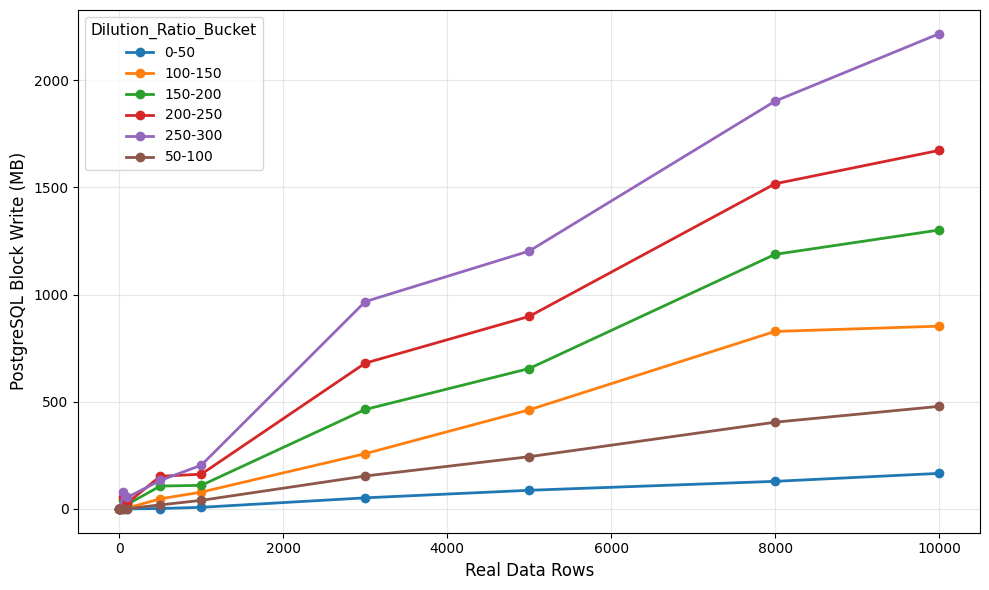

In [32]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_upload_psqlwrite['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_upload_psqlwrite[averaged_upload_psqlwrite['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['postgres_block_write_total_mb'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('PostgreSQL Block Write (MB)', fontsize=12)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/upload_psql_write.jpg', dpi=300, bbox_inches='tight')


# Read

In [268]:
read_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/read_eval.csv'
read = pd.read_csv(read_csv_path)
read["remain_read_time"] = read["read_real_data_time"] - read["deobfuscation_time"] - read["db_query_time"]
print(read)

     read_real_data_time  db_query_time  deobfuscation_time  \
0               0.233585       0.106801            0.039732   
1               0.040153       0.014688            0.000722   
2               0.047483       0.013554            0.001269   
3               0.064990       0.029876            0.006654   
4               0.159558       0.098643            0.031421   
..                   ...            ...                 ...   
905             0.031453       0.007691            0.000095   
906             0.059829       0.008379            0.000192   
907             0.031810       0.009443            0.001271   
908             0.171946       0.025737            0.010012   
909            19.942551      17.556702            0.040381   

     numbers_of_real_data_in_db_before_read  total_read_rows  data_per_true  \
0                                      8000             8000             10   
1                                        50               50             10   
2     

In [34]:
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '50-100', '100-150', '150-200','200-250','250-300']
read['Dilution_Ratio_Bucket'] = pd.cut(upload['data_per_true'], bins=bins, labels=labels, right=False)

## subplots

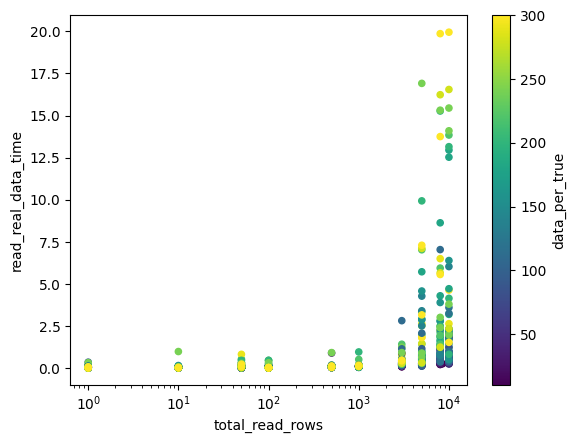

In [35]:
ax = read.plot.scatter(x='total_read_rows', y='read_real_data_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/read_real.png')

In [36]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','total_read_rows'], observed=True)[y].mean().reset_index()
averaged_read_time = bucket(read,'read_real_data_time')

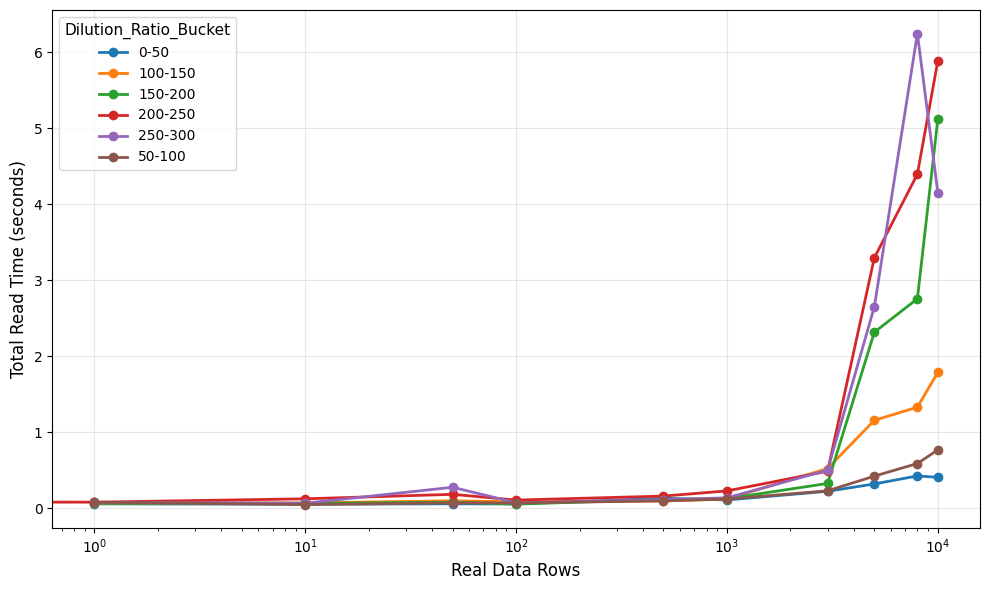

In [37]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_read_time['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_read_time[averaged_read_time['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('total_read_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['total_read_rows'], bucket_data['read_real_data_time'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Total Read Time (seconds)', fontsize=12)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/read_total.jpg', dpi=300, bbox_inches='tight')


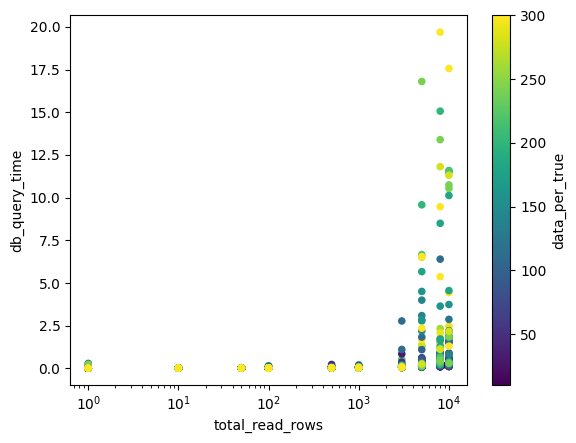

In [38]:
ax = read.plot.scatter(x='total_read_rows', y='db_query_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/read_all.png')

In [39]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','total_read_rows'], observed=True)[y].mean().reset_index()
averaged_dbquery_time = bucket(read,'db_query_time')

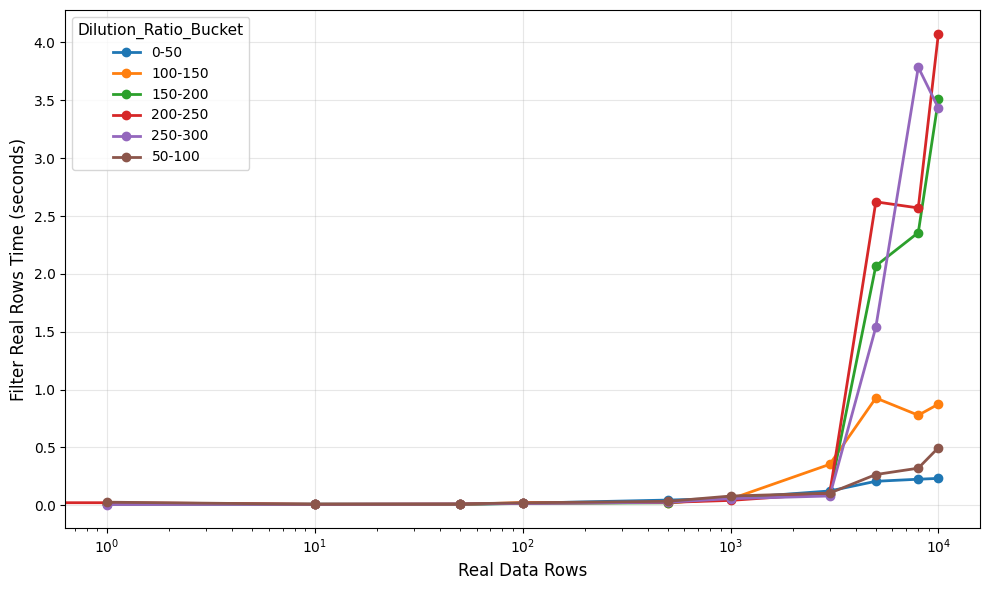

In [40]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_dbquery_time['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_dbquery_time[averaged_dbquery_time['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('total_read_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['total_read_rows'], bucket_data['db_query_time'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Filter Real Rows Time (seconds)', fontsize=12)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/read_real.jpg', dpi=300, bbox_inches='tight')


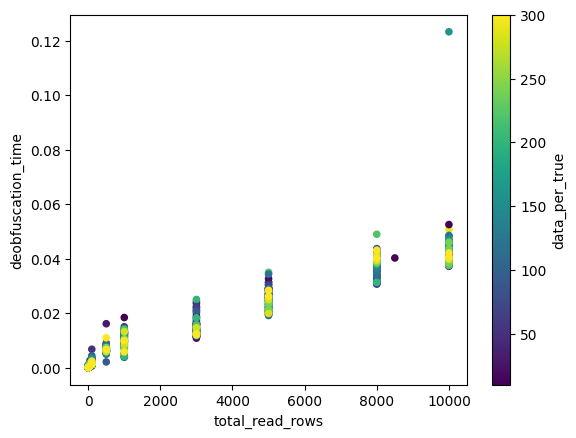

In [41]:
ax = read.plot.scatter(x='total_read_rows', y='deobfuscation_time',c='data_per_true',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/read_deobf.png')

In [42]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','total_read_rows'], observed=True)[y].mean().reset_index()
averaged_deobf_time = bucket(read,'deobfuscation_time')

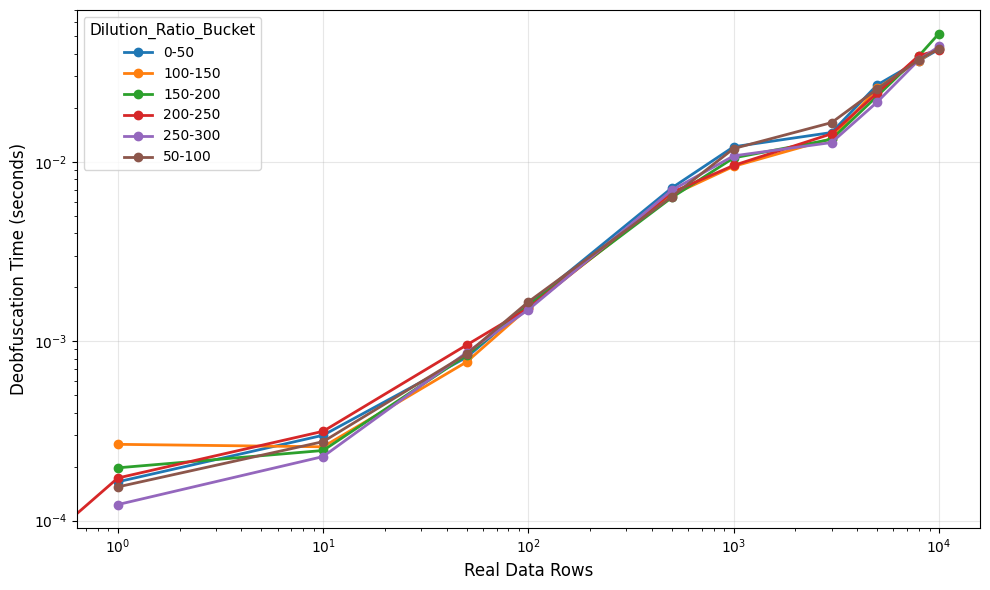

In [43]:
# Plot generate_fake_rows_time vs real_data_rows with Value_Bucket as legend
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_deobf_time['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_deobf_time[averaged_deobf_time['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('total_read_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['total_read_rows'], bucket_data['deobfuscation_time'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Deobfuscation Time (seconds)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/read_deobf.jpg', dpi=300, bbox_inches='tight')


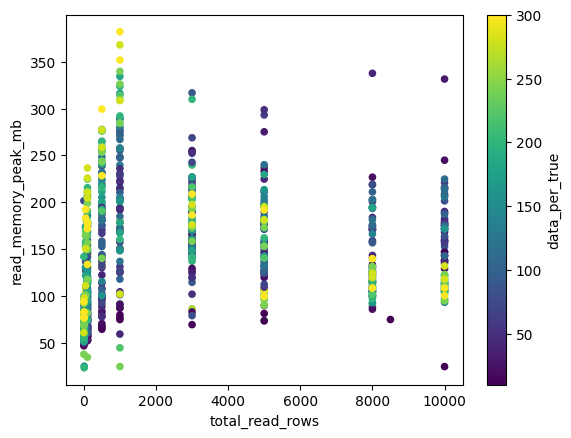

In [44]:
ax = read.plot.scatter(x='total_read_rows', y='read_memory_peak_mb',c='data_per_true',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/read_mem_peak.png')

In [45]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','total_read_rows'], observed=True)[y].mean().reset_index()
averaged_read_mem = bucket(read,'read_memory_peak_mb')

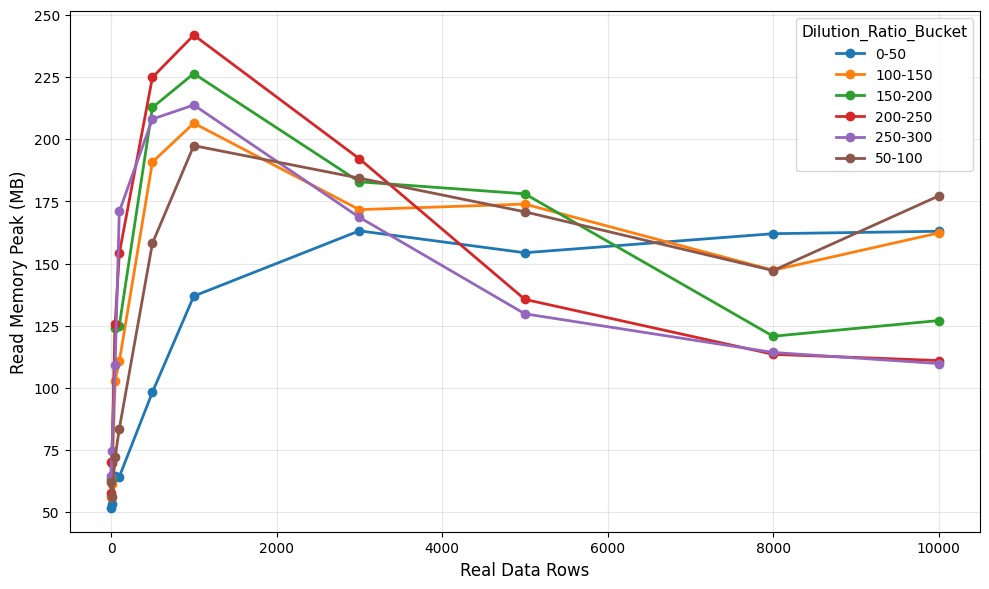

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_read_mem['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_read_mem[averaged_read_mem['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('total_read_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['total_read_rows'], bucket_data['read_memory_peak_mb'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Read Memory Peak (MB)', fontsize=12)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/read_mem.jpg', dpi=300, bbox_inches='tight')


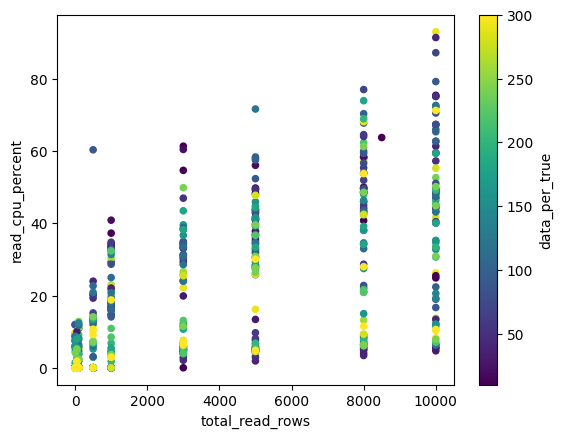

In [47]:
ax = read.plot.scatter(x='total_read_rows', y='read_cpu_percent',c='data_per_true',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/read_cpu.png')

In [48]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','total_read_rows'], observed=True)[y].mean().reset_index()
averaged_read_cpu = bucket(read,'read_cpu_percent')

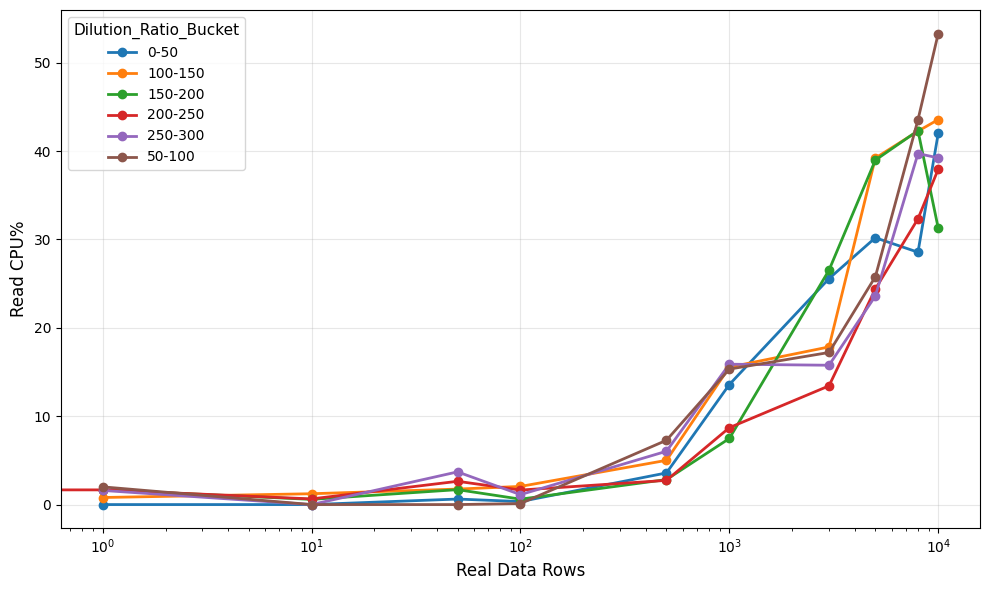

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_read_cpu['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_read_cpu[averaged_read_cpu['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('total_read_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['total_read_rows'], bucket_data['read_cpu_percent'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Read CPU%', fontsize=12)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/read_cpu.jpg', dpi=300, bbox_inches='tight')


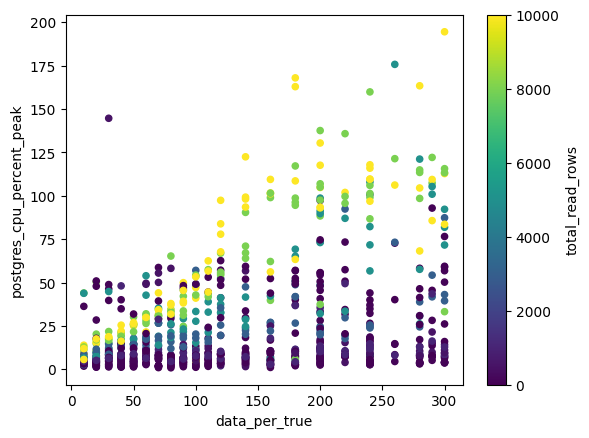

In [50]:
ax = read.plot.scatter(x='data_per_true', y='postgres_cpu_percent_peak',c='total_read_rows',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/read_psql_cpu.png')

In [51]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','total_read_rows'], observed=True)[y].mean().reset_index()
averaged_read_psql_cpu = bucket(read,'postgres_cpu_percent_peak')

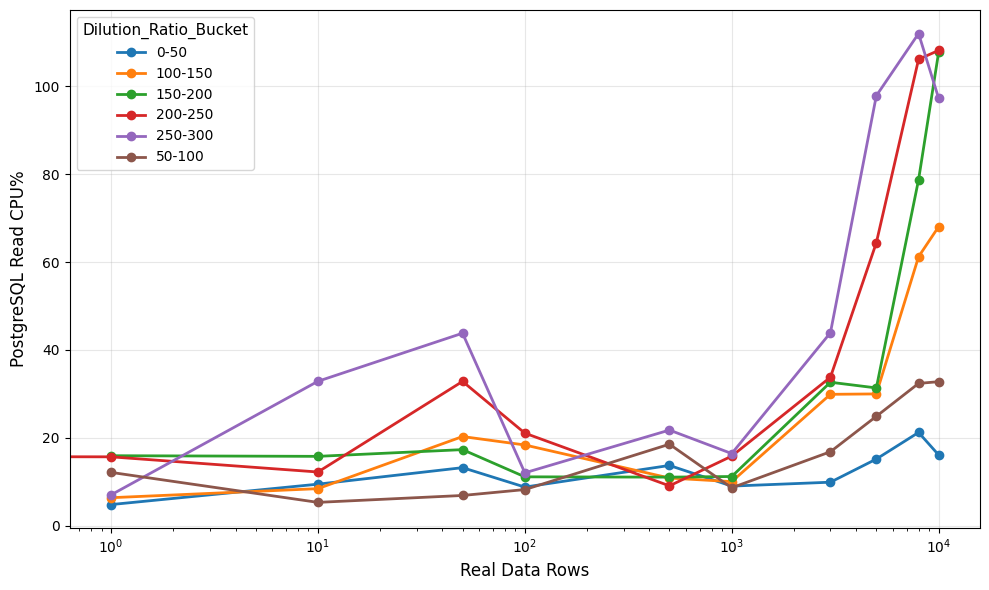

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_read_psql_cpu['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_read_psql_cpu[averaged_read_psql_cpu['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('total_read_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['total_read_rows'], bucket_data['postgres_cpu_percent_peak'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('PostgreSQL Read CPU%', fontsize=12)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/read_psql_cpu.jpg', dpi=300, bbox_inches='tight')


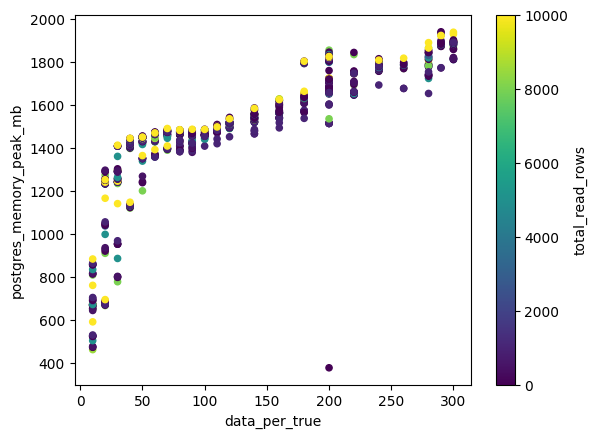

In [53]:
ax = read.plot.scatter(x='data_per_true', y='postgres_memory_peak_mb',c='total_read_rows',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')
#fig = ax.get_figure()
#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/read_psql_mem_peak.png')

In [54]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','total_read_rows'], observed=True)[y].mean().reset_index()
averaged_read_psql_mem = bucket(read,'postgres_memory_peak_mb')

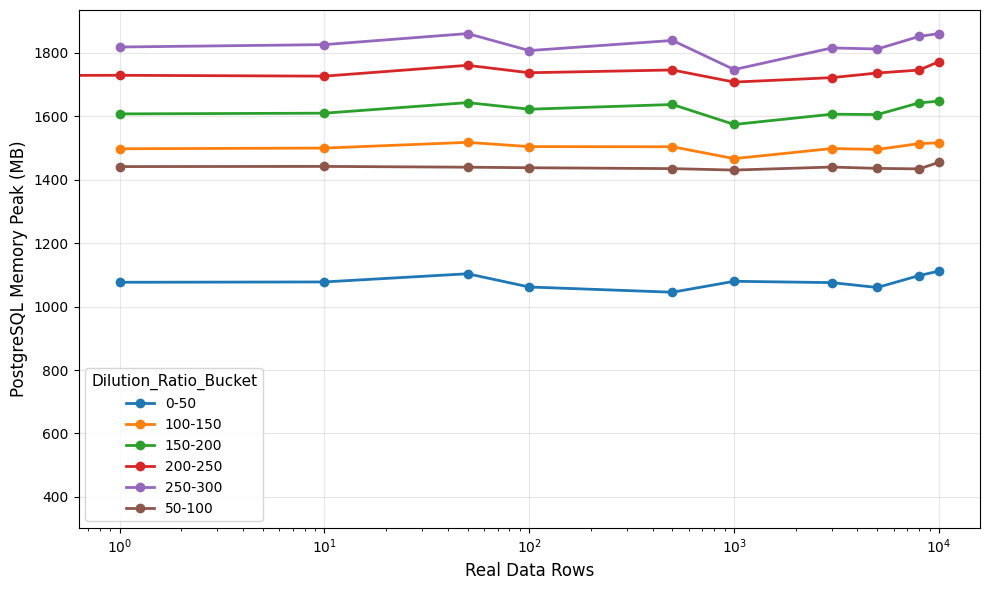

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_read_psql_mem['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_read_psql_mem[averaged_read_psql_mem['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('total_read_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['total_read_rows'], bucket_data['postgres_memory_peak_mb'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('PostgreSQL Memory Peak (MB)', fontsize=12)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/read_psql_mem.jpg', dpi=300, bbox_inches='tight')


In [123]:
upload_logging_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/upload_with_logging_eval.csv'
upload_logging = pd.read_csv(upload_logging_csv_path)
upload_logging['total_rows'] = upload_logging['data_per_true']*upload_logging['real_data_rows']
print(upload_logging)


     data_per_true  real_data_rows  fake_data_rows  generate_fake_rows_time  \
0               10            8000           72000                 5.066341   
1               10              50             450                 0.044243   
2               10             100             900                 0.124055   
3               10             500            4500                 0.381390   
4               10            5000           45000                 2.858624   
..             ...             ...             ...                      ...   
433            100               1              99                 0.028467   
434            100              10             990                 0.085256   
435            100             100            9900                 1.294654   
436            100            1000           99000                13.311383   
437            100           10000          990000                84.518568   

     obfuscation_time  numbers_of_real_data_in_db_b

In [124]:
bins = [0,20,40,60,80,100]
labels = ['0-20', '20-40', '40-60', '60-80','80-100']
upload_logging['Dilution_Ratio_Bucket'] = pd.cut(upload_logging['data_per_true'], bins=bins, labels=labels, right=False)

In [125]:
def bucket(df,y):
    return df.groupby(['Dilution_Ratio_Bucket','real_data_rows'], observed=True)[y].mean().reset_index()
averaged_upload_elk_cpu = bucket(upload_logging,'elasticsearch_cpu_percent_peak')

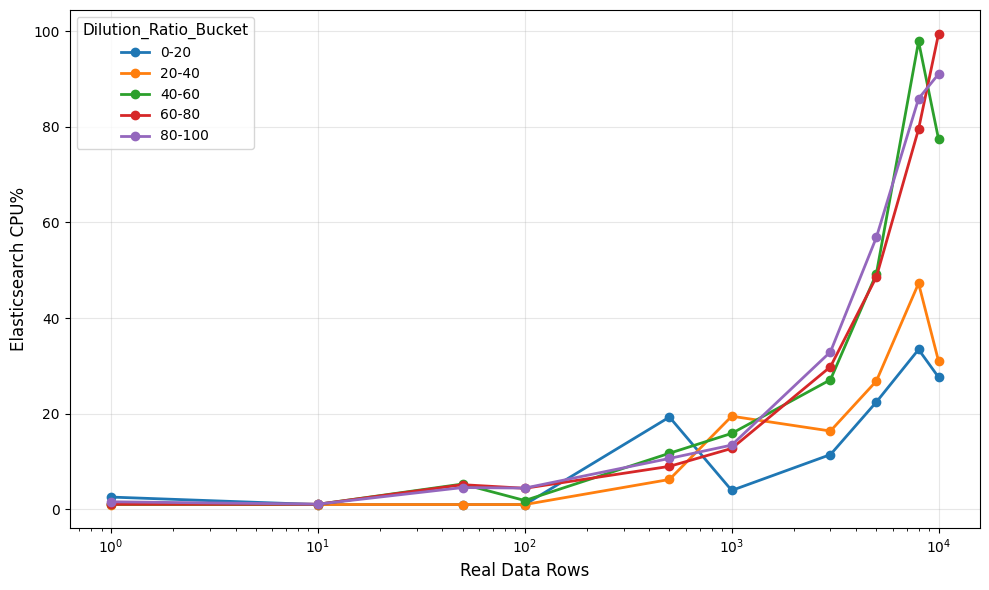

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique buckets that actually have data
buckets = averaged_upload_elk_mem['Dilution_Ratio_Bucket'].unique()
buckets = sorted([b for b in buckets if pd.notna(b)])  # Remove NaN and sort

# Plot each bucket as a separate line
for bucket in buckets:
    bucket_data = averaged_upload_elk_mem[averaged_upload_elk_mem['Dilution_Ratio_Bucket'] == bucket]
    bucket_data = bucket_data.sort_values('real_data_rows')
    if len(bucket_data) > 0:  # Only plot if there's data
        ax.plot(bucket_data['real_data_rows'], bucket_data['elasticsearch_cpu_percent_peak'], 
                marker='o', label=bucket, linewidth=2, markersize=6)

ax.set_xlabel('Real Data Rows', fontsize=12)
ax.set_ylabel('Elasticsearch CPU%', fontsize=12)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(title='Dilution_Ratio_Bucket', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/new/read_psql_mem.jpg', dpi=300, bbox_inches='tight')


In [176]:
upload_0 = upload[['data_per_true','real_data_rows','generate_fake_rows_time','obfuscation_time','db_write_time','upload_time','upload_cpu_percent','upload_memory_peak_mb','postgres_cpu_percent_peak','postgres_memory_peak_mb','postgres_block_write_total_mb']]

In [177]:
upload_0 = upload_0[upload_0['data_per_true']<=100]

In [178]:
upload_0['logging']= 0

In [179]:
summary_df0 = upload_0.groupby(['data_per_true','real_data_rows']).mean().reset_index()

In [180]:
summary_df0

,data_per_true,real_data_rows,generate_fake_rows_time,obfuscation_time,db_write_time,upload_time,upload_cpu_percent,upload_memory_peak_mb,postgres_cpu_percent_peak,postgres_memory_peak_mb,postgres_block_write_total_mb,logging
0,10,1,0.006699,0.000995,0.009989,0.512202,0.000,81.95500,0.6600,684.2400,0.0000,0.0
1,10,10,0.027397,0.000669,0.022484,0.747201,0.000,70.64000,0.6600,684.7950,0.0000,0.0
2,10,50,0.069193,0.002397,0.174017,1.263569,68.175,96.19250,0.6600,647.7025,0.0000,0.0
3,10,100,0.100774,0.002200,0.522460,1.208733,93.800,80.96875,0.7975,668.3175,0.0325,0.0
4,10,500,0.317584,0.007155,0.395731,1.330492,99.350,135.04250,2.2100,652.1450,0.0275,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,100,1000,5.504352,0.016542,6.048552,14.264991,100.175,479.17250,65.5450,1462.6725,65.4550,0.0
96,100,3000,16.212982,0.047767,18.979326,45.951552,101.100,950.72000,85.1300,1459.6475,208.8150,0.0
97,100,5000,27.322493,0.076187,32.246173,82.156432,100.200,1214.72000,75.3750,1472.8450,381.7800,0.0
98,100,8000,43.462517,0.175707,61.784068,155.819495,101.300,1556.34750,107.3250,1471.9025,647.2650,0.0


In [181]:
upload_1 = upload_logging[['data_per_true','real_data_rows','generate_fake_rows_time','obfuscation_time','db_write_time','upload_time','upload_cpu_percent','upload_memory_peak_mb','postgres_cpu_percent_peak','postgres_memory_peak_mb','postgres_block_write_total_mb']]

In [182]:
upload_1['logging']= 1

/var/folders/x3/0t4c9q1s61b_sjzcn6rmbhdw0000gn/T/ipykernel_62313/3960453397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upload_1['logging']= 1


In [183]:
summary_df1 = upload_1.groupby(['data_per_true','real_data_rows']).mean().reset_index()

In [184]:
summary_df1

,data_per_true,real_data_rows,generate_fake_rows_time,obfuscation_time,db_write_time,upload_time,upload_cpu_percent,upload_memory_peak_mb,postgres_cpu_percent_peak,postgres_memory_peak_mb,postgres_block_write_total_mb,logging
0,10,1,0.008883,0.000549,0.009533,0.924050,6.050,73.5675,0.6600,553.54750,0.0625,1.0
1,10,10,0.025401,0.000694,0.031911,0.633983,0.000,68.4950,0.6600,553.33000,0.0000,1.0
2,10,50,0.052619,0.002001,0.080326,1.366688,54.700,60.0325,0.6600,519.36000,0.0000,1.0
3,10,100,0.109280,0.002494,0.104181,1.029760,90.400,69.9150,0.6600,538.58625,0.0000,1.0
4,10,500,0.346762,0.012722,0.695965,2.539943,93.075,143.3425,48.7400,499.11500,0.7725,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,100,1000,9.311532,0.033662,11.541214,25.424317,99.025,457.0175,70.5825,951.64500,66.3950,1.0
96,100,3000,21.430152,0.052682,28.717499,61.365777,100.300,858.6925,107.4000,1157.73750,218.6700,1.0
97,100,5000,32.151521,0.191108,66.470596,124.315891,101.925,1024.3350,94.4425,1143.02000,373.0425,1.0
98,100,8000,54.643407,0.539342,208.227180,321.994328,100.300,1181.8450,278.8750,993.30750,648.8000,1.0


In [256]:
# Compare summary_df0 (logging=0) vs summary_df1 (logging=1)
# Merge the two dataframes on data_per_true and real_data_rows
comparison_df = summary_df0.merge(
    summary_df1, 
    on=['data_per_true', 'real_data_rows'], 
    suffixes=('_no_logging', '_with_logging'),
    how='outer'
)

# Get all numeric columns to compare (excluding logging columns)
numeric_cols = [col for col in summary_df0.columns 
                if col not in ['data_per_true', 'real_data_rows', 'logging']]


# Calculate differences and percentage changes
for col in numeric_cols:
    col_no_log = f"{col}_no_logging"
    col_with_log = f"{col}_with_logging"
    
    if col_no_log in comparison_df.columns and col_with_log in comparison_df.columns:
        comparison_df[f"{col}_diff"] = comparison_df[col_with_log] - comparison_df[col_no_log]
        comparison_df[f"{col}_pct_change"] = (
            (comparison_df[col_with_log] - comparison_df[col_no_log]) / 
            comparison_df[col_no_log].replace(0, np.nan) * 100
        )

for col in numeric_cols:
    col_no_log = f"{col}_no_logging"
    col_with_log = f"{col}_with_logging"
    col_diff = f"{col}_diff"
    col_pct = f"{col}_pct_change"
    
    if all(c in comparison_df.columns for c in [col_no_log, col_with_log, col_diff, col_pct]):
        valid_data = comparison_df[[col_no_log, col_with_log, col_diff, col_pct]].dropna()
        
        if len(valid_data) > 0:
            print(f"\n{col.upper()}:")
            print(f"  No Logging (mean):    {valid_data[col_no_log].mean():.6f}")
            print(f"  With Logging (mean):   {valid_data[col_with_log].mean():.6f}")
            print(f"  Average Difference:    {valid_data[col_diff].mean():.6f}")
            print(f"  Average % Change:      {valid_data[col_pct].mean():.2f}%")
            print(f"  Max Increase:          {valid_data[col_diff].max():.6f} ({valid_data[col_pct].max():.2f}%)")
            print(f"  Max Decrease:         {valid_data[col_diff].min():.6f} ({valid_data[col_pct].min():.2f}%)")


display_cols = ['data_per_true', 'real_data_rows'] + \
               [f"{col}_no_logging" for col in numeric_cols] + \
               [f"{col}_with_logging" for col in numeric_cols] + \
               [f"{col}_diff" for col in numeric_cols] + \
               [f"{col}_pct_change" for col in numeric_cols]

available_cols = [col for col in display_cols if col in comparison_df.columns]
print(comparison_df[available_cols].head(20).to_string())


pct_cols = [f"{col}_pct_change" for col in numeric_cols if f"{col}_pct_change" in comparison_df.columns]
if pct_cols:
    pivot_data = comparison_df[['data_per_true'] + pct_cols].groupby('data_per_true').mean()
    print(pivot_data.to_string())


if pct_cols:
    pivot_data = comparison_df[['real_data_rows'] + pct_cols].groupby('real_data_rows').mean()
    print(pivot_data.to_string())


KeyError: 'real_data_rows'

In [257]:
# Plot features vs real_data_rows, averaging over data_per_true
# Create individual plots for each feature instead of subplots

for col in numeric_cols:
    col_no_log = f"{col}_no_logging"
    col_with_log = f"{col}_with_logging"
    
    if col_no_log in comparison_df.columns and col_with_log in comparison_df.columns:
        # Average over data_per_true, group by real_data_rows
        grouped_no_log = comparison_df.groupby('real_data_rows')[col_no_log].mean().reset_index()
        grouped_with_log = comparison_df.groupby('real_data_rows')[col_with_log].mean().reset_index()
        
        # Sort by real_data_rows
        grouped_no_log = grouped_no_log.sort_values('real_data_rows')
        grouped_with_log = grouped_with_log.sort_values('real_data_rows')
        
        # Create individual figure for this feature
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot both lines
        ax.plot(grouped_no_log['real_data_rows'], grouped_no_log[col_no_log], 
               marker='o', label='No Logging', linewidth=2, markersize=6, alpha=0.8)
        ax.plot(grouped_with_log['real_data_rows'], grouped_with_log[col_with_log], 
               marker='s', label='With Logging', linewidth=2, markersize=6, alpha=0.8)
        
        ax.set_xlabel('Real Data Rows', fontsize=12)
        ax.set_ylabel(col, fontsize=12)
        ax.set_title(f'{col}', fontsize=14, fontweight='bold')
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.set_xscale('log')
        ax.set_yscale('log')
        
        # Add percentage change annotation
        if len(grouped_no_log) > 0 and len(grouped_with_log) > 0:
            # Calculate overall average percentage change
            merged = grouped_no_log.merge(grouped_with_log, on='real_data_rows', suffixes=('_no', '_with'))
            merged['pct_change'] = ((merged[col_with_log] - merged[col_no_log]) / merged[col_no_log].replace(0, np.nan) * 100)
            avg_pct = merged['pct_change'].mean()
            if not np.isnan(avg_pct):
                ax.text(0.05, 0.95, f'Avg % Change: {avg_pct:.2f}%', 
                       transform=ax.transAxes, fontsize=10,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.show()



KeyError: 'real_data_rows'

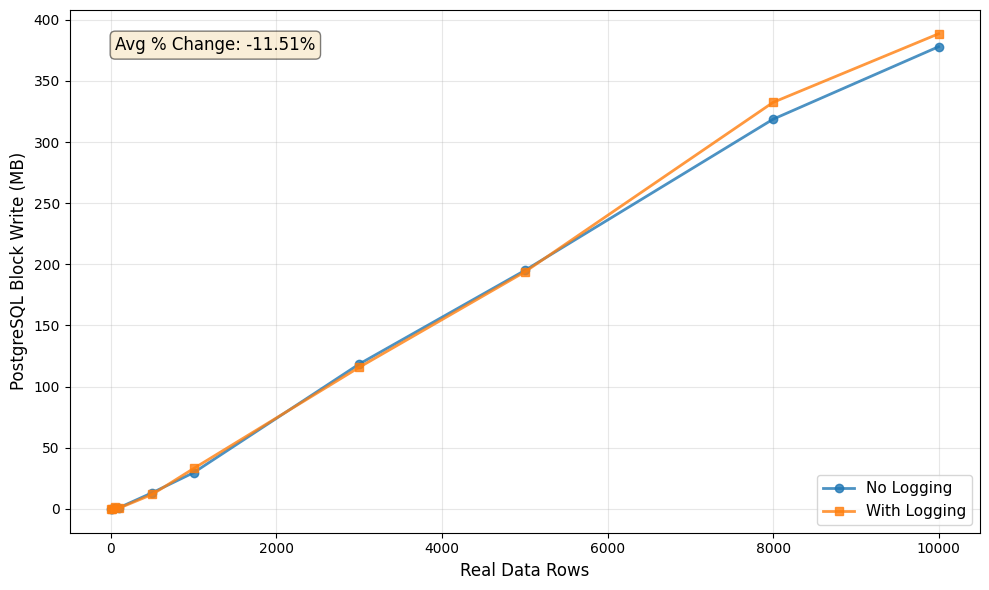

In [228]:
col = numeric_cols[8]
col_no_log = f"{col}_no_logging"
col_with_log = f"{col}_with_logging"

if col_no_log in comparison_df.columns and col_with_log in comparison_df.columns:
    # Average over data_per_true, group by real_data_rows
    grouped_no_log = comparison_df.groupby('real_data_rows')[col_no_log].mean().reset_index()
    grouped_with_log = comparison_df.groupby('real_data_rows')[col_with_log].mean().reset_index()

    # Sort by real_data_rows
    grouped_no_log = grouped_no_log.sort_values('real_data_rows')
    grouped_with_log = grouped_with_log.sort_values('real_data_rows')

    # Create individual figure for this feature
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot both lines
    ax.plot(grouped_no_log['real_data_rows'], grouped_no_log[col_no_log], 
           marker='o', label='No Logging', linewidth=2, markersize=6, alpha=0.8)
    ax.plot(grouped_with_log['real_data_rows'], grouped_with_log[col_with_log], 
           marker='s', label='With Logging', linewidth=2, markersize=6, alpha=0.8)

    ax.set_xlabel('Real Data Rows', fontsize=12)
    ax.set_ylabel('PostgreSQL Block Write (MB)', fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    #ax.set_xscale('log')
    #ax.set_yscale('log')

    # Add percentage change annotation
    if len(grouped_no_log) > 0 and len(grouped_with_log) > 0:
        # Calculate overall average percentage change
        merged = grouped_no_log.merge(grouped_with_log, on='real_data_rows', suffixes=('_no', '_with'))
        merged['pct_change'] = ((merged[col_with_log] - merged[col_no_log]) / merged[col_no_log].replace(0, np.nan) * 100)
        avg_pct = merged['pct_change'].mean()
        if not np.isnan(avg_pct):
            ax.text(0.05, 0.95, f'Avg % Change: {avg_pct:.2f}%', 
                   transform=ax.transAxes, fontsize=12,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()
    fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/compare/upload_psql_write_compare.jpg', dpi=300, bbox_inches='tight')

In [269]:
read_logging_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/read_with_logging_eval.csv'
read_logging = pd.read_csv(read_logging_csv_path)
print(read_logging)


     read_real_data_time  db_query_time  deobfuscation_time  \
0               0.277221       0.152534            0.036871   
1               0.036665       0.015689            0.000798   
2               0.306919       0.119291            0.002386   
3               0.057163       0.022930            0.006190   
4               0.148555       0.066107            0.021155   
..                   ...            ...                 ...   
432             4.799123       2.125358            0.000543   
433             0.124784       0.029253            0.000639   
434             0.112359       0.012640            0.001376   
435             0.165990       0.072444            0.009299   
436             3.963958       3.585273            0.107424   

     numbers_of_real_data_in_db_before_read  total_read_rows  data_per_true  \
0                                      8000             8000             10   
1                                        50               50             10   
2     

In [270]:
bins = [0,20,40,60,80,100]
labels = ['0-20', '20-40', '40-60', '60-80','80-100']
read_logging['Dilution_Ratio_Bucket'] = pd.cut(read_logging['data_per_true'], bins=bins, labels=labels, right=False)

In [271]:
read_0 = read[['data_per_true','total_read_rows','read_real_data_time','db_query_time','deobfuscation_time','read_memory_peak_mb','read_cpu_percent','postgres_memory_peak_mb','postgres_cpu_percent_peak']]
read_0 = read_0[read_0['data_per_true']<=100]
read_0['logging']= 0

In [272]:
summary_df0 = read_0.groupby(['data_per_true','total_read_rows']).mean().reset_index()
summary_df0

,data_per_true,total_read_rows,read_real_data_time,db_query_time,deobfuscation_time,read_memory_peak_mb,read_cpu_percent,postgres_memory_peak_mb,postgres_cpu_percent_peak,logging
0,10,1,0.051272,0.010511,0.000196,50.79000,0.000,684.340000,3.20500,0.0
1,10,10,0.044550,0.009992,0.000354,51.29250,0.000,685.155000,2.76250,0.0
2,10,50,0.045103,0.011486,0.000790,57.78000,0.000,650.187500,4.17250,0.0
3,10,100,0.058339,0.021497,0.001757,54.93625,0.000,669.905000,7.47375,0.0
4,10,500,0.080073,0.034550,0.006907,84.75750,0.000,650.362500,4.12750,0.0
...,...,...,...,...,...,...,...,...,...,...
95,100,1000,0.133059,0.055613,0.009837,213.48500,20.900,1445.837500,18.21750,0.0
96,100,3000,0.230388,0.091160,0.012927,166.52500,20.000,1458.707500,36.14250,0.0
97,100,5000,0.494919,0.377042,0.025447,166.79500,44.575,1445.917500,21.94000,0.0
98,100,8000,0.691212,0.332227,0.033324,167.48000,60.600,1472.433333,50.29000,0.0


In [273]:
read_1 = read_logging[['data_per_true','total_read_rows','read_real_data_time','db_query_time','deobfuscation_time','read_memory_peak_mb','read_cpu_percent','postgres_memory_peak_mb','postgres_cpu_percent_peak']]
read_1['logging']= 1

/var/folders/x3/0t4c9q1s61b_sjzcn6rmbhdw0000gn/T/ipykernel_62313/270591306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_1['logging']= 1


In [274]:
summary_df1 = read_1.groupby(['data_per_true','total_read_rows']).mean().reset_index()
summary_df1

,data_per_true,total_read_rows,read_real_data_time,db_query_time,deobfuscation_time,read_memory_peak_mb,read_cpu_percent,postgres_memory_peak_mb,postgres_cpu_percent_peak,logging
0,10,1,0.058866,0.014107,0.000309,47.7550,3.6750,553.7375,4.1775,1.0
1,10,10,0.107705,0.077876,0.000239,55.8725,2.7250,554.3400,9.6750,1.0
2,10,50,0.053963,0.011804,0.000810,53.6525,0.0000,522.4350,4.1525,1.0
3,10,100,0.120806,0.068178,0.001407,53.7300,2.4375,526.1600,25.8450,1.0
4,10,500,0.076721,0.037925,0.008322,70.2350,5.9750,501.2650,7.3775,1.0
...,...,...,...,...,...,...,...,...,...,...
95,100,1000,0.435574,0.169142,0.011027,125.9825,11.1000,833.9475,24.2200,1.0
96,100,3000,0.458413,0.236965,0.017284,128.1475,15.8500,1156.0525,43.5375,1.0
97,100,5000,0.505032,0.243213,0.025960,139.4300,30.0250,1085.8400,39.1225,1.0
98,100,8000,1.127596,0.798695,0.050158,77.5550,41.3750,990.4075,154.0300,1.0


In [275]:
# Compare summary_df0 (logging=0) vs summary_df1 (logging=1)
# Merge the two dataframes on data_per_true and real_data_rows
comparison_df = summary_df0.merge(
    summary_df1, 
    on=['data_per_true', 'total_read_rows'], 
    suffixes=('_no_logging', '_with_logging'),
    how='outer'
)

# Get all numeric columns to compare (excluding logging columns)
numeric_cols = [col for col in summary_df0.columns 
                if col not in ['data_per_true', 'total_read_rows', 'logging']]


# Calculate differences and percentage changes
for col in numeric_cols:
    col_no_log = f"{col}_no_logging"
    col_with_log = f"{col}_with_logging"
    
    if col_no_log in comparison_df.columns and col_with_log in comparison_df.columns:
        comparison_df[f"{col}_diff"] = comparison_df[col_with_log] - comparison_df[col_no_log]
        comparison_df[f"{col}_pct_change"] = (
            (comparison_df[col_with_log] - comparison_df[col_no_log]) / 
            comparison_df[col_no_log].replace(0, np.nan) * 100
        )

for col in numeric_cols:
    col_no_log = f"{col}_no_logging"
    col_with_log = f"{col}_with_logging"
    col_diff = f"{col}_diff"
    col_pct = f"{col}_pct_change"
    
    if all(c in comparison_df.columns for c in [col_no_log, col_with_log, col_diff, col_pct]):
        valid_data = comparison_df[[col_no_log, col_with_log, col_diff, col_pct]].dropna()
        
        if len(valid_data) > 0:
            print(f"\n{col.upper()}:")
            print(f"  No Logging (mean):    {valid_data[col_no_log].mean():.6f}")
            print(f"  With Logging (mean):   {valid_data[col_with_log].mean():.6f}")
            print(f"  Average Difference:    {valid_data[col_diff].mean():.6f}")
            print(f"  Average % Change:      {valid_data[col_pct].mean():.2f}%")
            print(f"  Max Increase:          {valid_data[col_diff].max():.6f} ({valid_data[col_pct].max():.2f}%)")
            print(f"  Max Decrease:         {valid_data[col_diff].min():.6f} ({valid_data[col_pct].min():.2f}%)")


display_cols = ['data_per_true', 'total_read_rows'] + \
               [f"{col}_no_logging" for col in numeric_cols] + \
               [f"{col}_with_logging" for col in numeric_cols] + \
               [f"{col}_diff" for col in numeric_cols] + \
               [f"{col}_pct_change" for col in numeric_cols]

available_cols = [col for col in display_cols if col in comparison_df.columns]
print(comparison_df[available_cols].head(20).to_string())


pct_cols = [f"{col}_pct_change" for col in numeric_cols if f"{col}_pct_change" in comparison_df.columns]
if pct_cols:
    pivot_data = comparison_df[['data_per_true'] + pct_cols].groupby('data_per_true').mean()
    print(pivot_data.to_string())


if pct_cols:
    pivot_data = comparison_df[['total_read_rows'] + pct_cols].groupby('total_read_rows').mean()
    print(pivot_data.to_string())



READ_REAL_DATA_TIME:
  No Logging (mean):    0.230900
  With Logging (mean):   0.282253
  Average Difference:    0.051354
  Average % Change:      51.97%
  Max Increase:          1.203034 (2453.98%)
  Max Decrease:         -0.354779 (-68.69%)

DB_QUERY_TIME:
  No Logging (mean):    0.124292
  With Logging (mean):   0.120254
  Average Difference:    -0.004037
  Average % Change:      125.06%
  Max Increase:          0.754285 (8480.46%)
  Max Decrease:         -0.548118 (-90.28%)

DEOBFUSCATION_TIME:
  No Logging (mean):    0.014188
  With Logging (mean):   0.014173
  Average Difference:    -0.000016
  Average % Change:      18.02%
  Max Increase:          0.017049 (444.09%)
  Max Decrease:         -0.008940 (-37.05%)

READ_MEMORY_PEAK_MB:
  No Logging (mean):    123.624096
  With Logging (mean):   101.694087
  Average Difference:    -21.930008
  Average % Change:      -14.98%
  Max Increase:          60.375000 (39.78%)
  Max Decrease:         -89.925000 (-53.69%)

READ_CPU_PERCENT:
  N

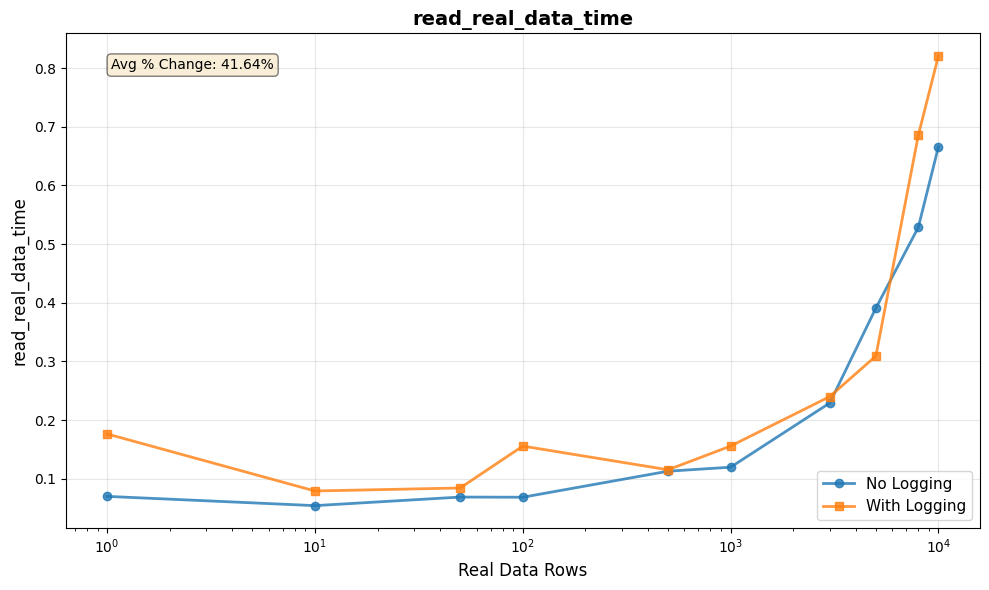

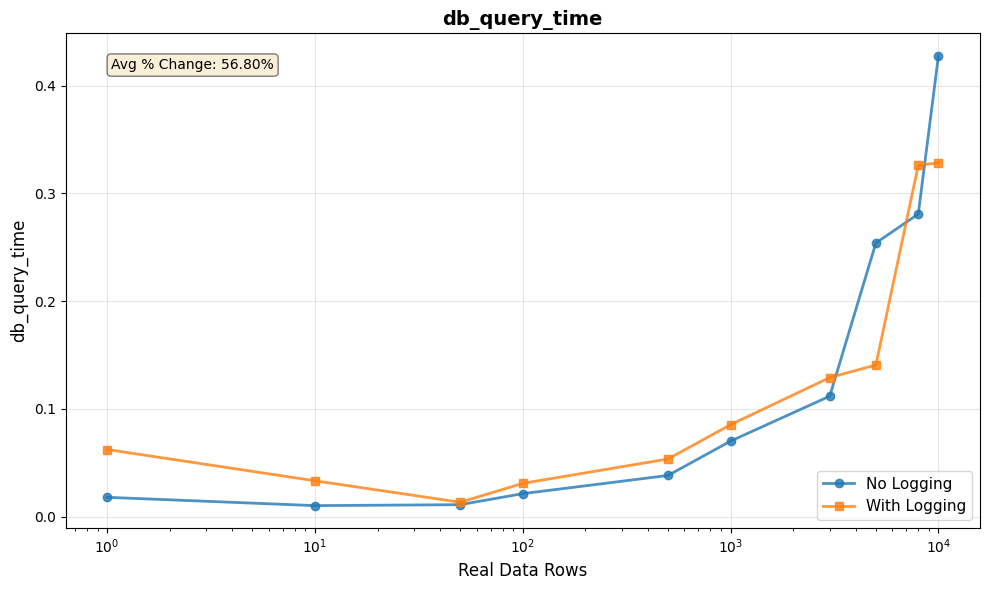

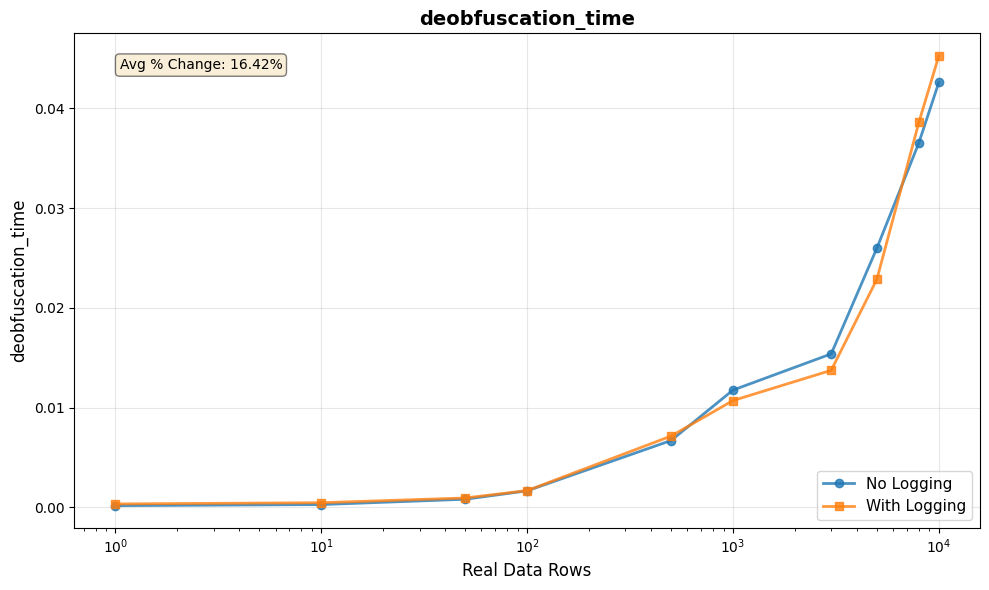

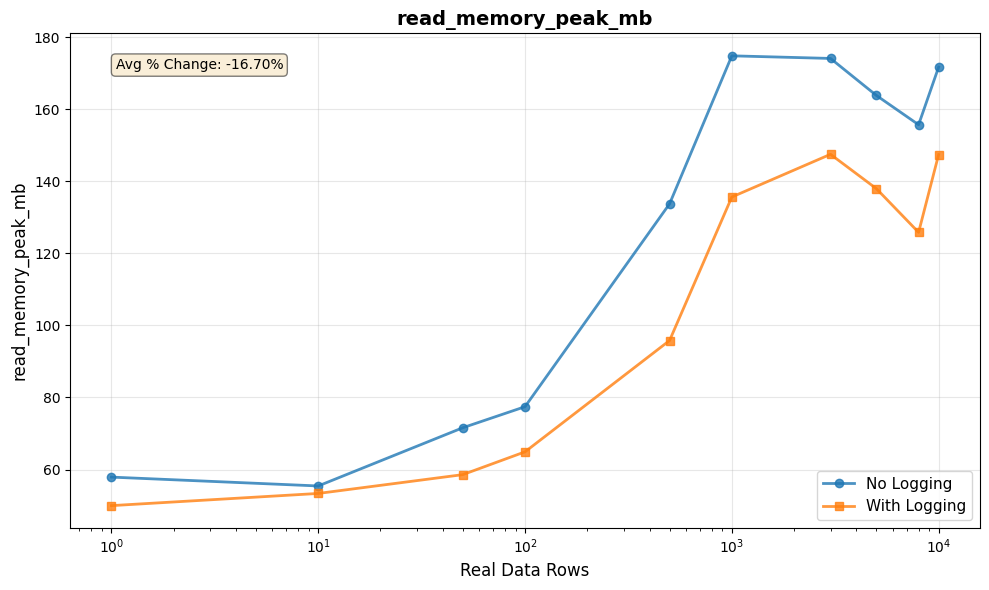

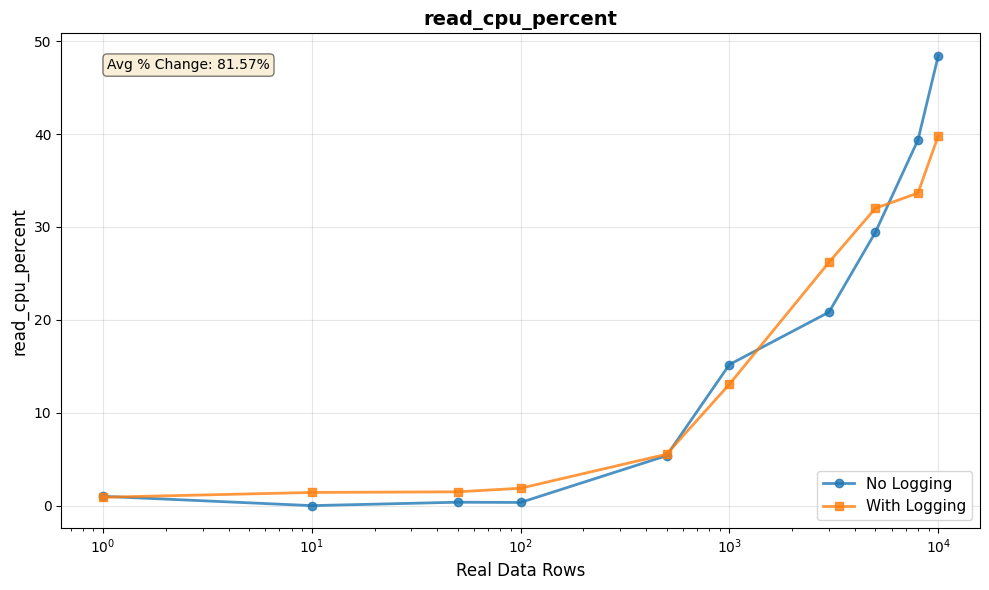

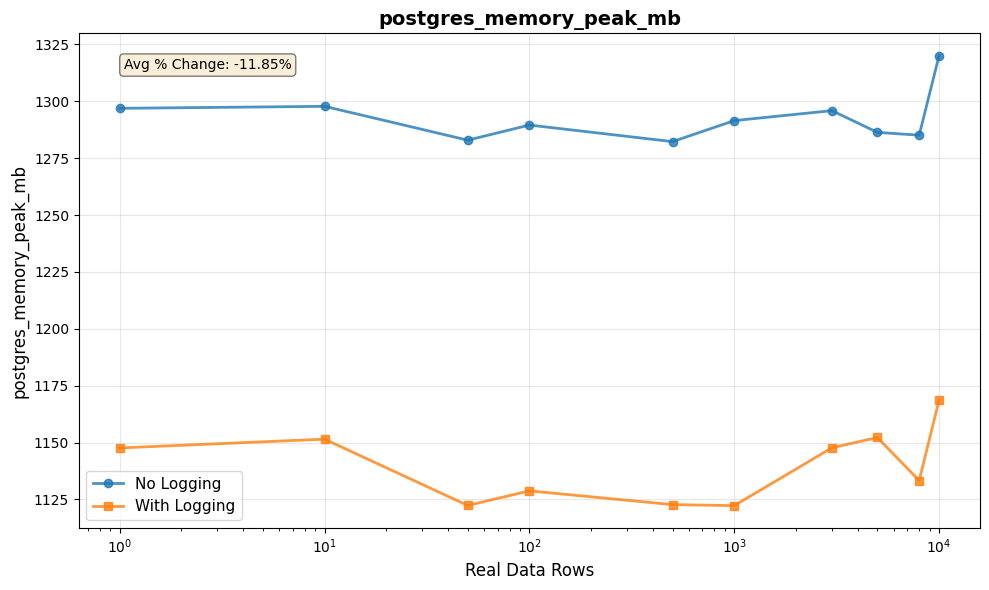

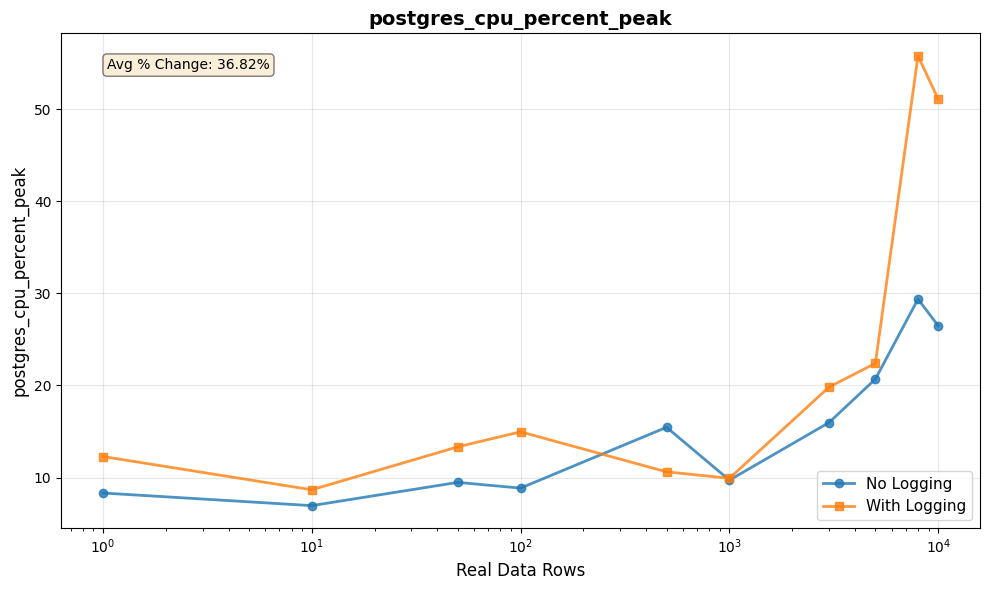

In [281]:
# Plot features vs real_data_rows, averaging over data_per_true
# Create individual plots for each feature instead of subplots

for col in numeric_cols:
    col_no_log = f"{col}_no_logging"
    col_with_log = f"{col}_with_logging"
    
    if col_no_log in comparison_df.columns and col_with_log in comparison_df.columns:
        # Average over data_per_true, group by real_data_rows
        grouped_no_log = comparison_df.groupby('total_read_rows')[col_no_log].mean().reset_index()
        grouped_with_log = comparison_df.groupby('total_read_rows')[col_with_log].mean().reset_index()
        
        # Sort by real_data_rows
        grouped_no_log = grouped_no_log.sort_values('total_read_rows')
        grouped_with_log = grouped_with_log.sort_values('total_read_rows')
        
        # Create individual figure for this feature
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot both lines
        ax.plot(grouped_no_log['total_read_rows'], grouped_no_log[col_no_log], 
               marker='o', label='No Logging', linewidth=2, markersize=6, alpha=0.8)
        ax.plot(grouped_with_log['total_read_rows'], grouped_with_log[col_with_log], 
               marker='s', label='With Logging', linewidth=2, markersize=6, alpha=0.8)
        
        ax.set_xlabel('Real Data Rows', fontsize=12)
        ax.set_ylabel(col, fontsize=12)
        ax.set_title(f'{col}', fontsize=14, fontweight='bold')
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.set_xscale('log')
        #ax.set_yscale('log')
        
        # Add percentage change annotation
        if len(grouped_no_log) > 0 and len(grouped_with_log) > 0:
            # Calculate overall average percentage change
            merged = grouped_no_log.merge(grouped_with_log, on='total_read_rows', suffixes=('_no', '_with'))
            merged['pct_change'] = ((merged[col_with_log] - merged[col_no_log]) / merged[col_no_log].replace(0, np.nan) * 100)
            avg_pct = merged['pct_change'].mean()
            if not np.isnan(avg_pct):
                ax.text(0.05, 0.95, f'Avg % Change: {avg_pct:.2f}%', 
                       transform=ax.transAxes, fontsize=10,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.show()

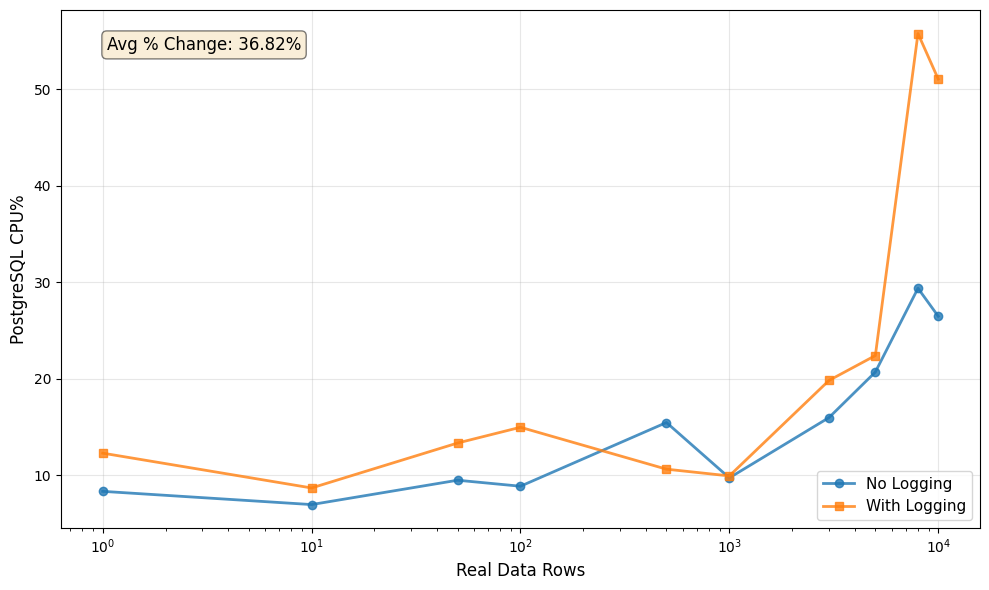

In [290]:
col = numeric_cols[6]
col_no_log = f"{col}_no_logging"
col_with_log = f"{col}_with_logging"

if col_no_log in comparison_df.columns and col_with_log in comparison_df.columns:
    # Average over data_per_true, group by real_data_rows
    grouped_no_log = comparison_df.groupby('total_read_rows')[col_no_log].mean().reset_index()
    grouped_with_log = comparison_df.groupby('total_read_rows')[col_with_log].mean().reset_index()

    # Sort by real_data_rows
    grouped_no_log = grouped_no_log.sort_values('total_read_rows')
    grouped_with_log = grouped_with_log.sort_values('total_read_rows')

    # Create individual figure for this feature
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot both lines
    ax.plot(grouped_no_log['total_read_rows'], grouped_no_log[col_no_log], 
           marker='o', label='No Logging', linewidth=2, markersize=6, alpha=0.8)
    ax.plot(grouped_with_log['total_read_rows'], grouped_with_log[col_with_log], 
           marker='s', label='With Logging', linewidth=2, markersize=6, alpha=0.8)

    ax.set_xlabel('Real Data Rows', fontsize=12)
    ax.set_ylabel('PostgreSQL CPU%', fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_xscale('log')
    #ax.set_yscale('log')

    # Add percentage change annotation
    if len(grouped_no_log) > 0 and len(grouped_with_log) > 0:
        # Calculate overall average percentage change
        merged = grouped_no_log.merge(grouped_with_log, on='total_read_rows', suffixes=('_no', '_with'))
        merged['pct_change'] = ((merged[col_with_log] - merged[col_no_log]) / merged[col_no_log].replace(0, np.nan) * 100)
        avg_pct = merged['pct_change'].mean()
        if not np.isnan(avg_pct):
            ax.text(0.05, 0.95, f'Avg % Change: {avg_pct:.2f}%', 
                   transform=ax.transAxes, fontsize=12,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()
    fig.savefig('/Users/jingtingdai/Desktop/Master_Thesis/eval_plots/compare/read_psql_cpu_compare.jpg', dpi=300, bbox_inches='tight')